In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [72]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


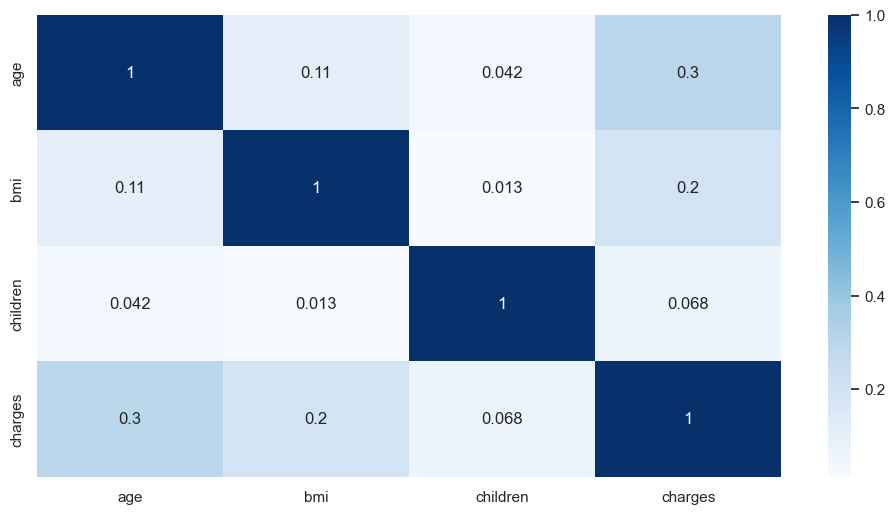

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap="Blues");

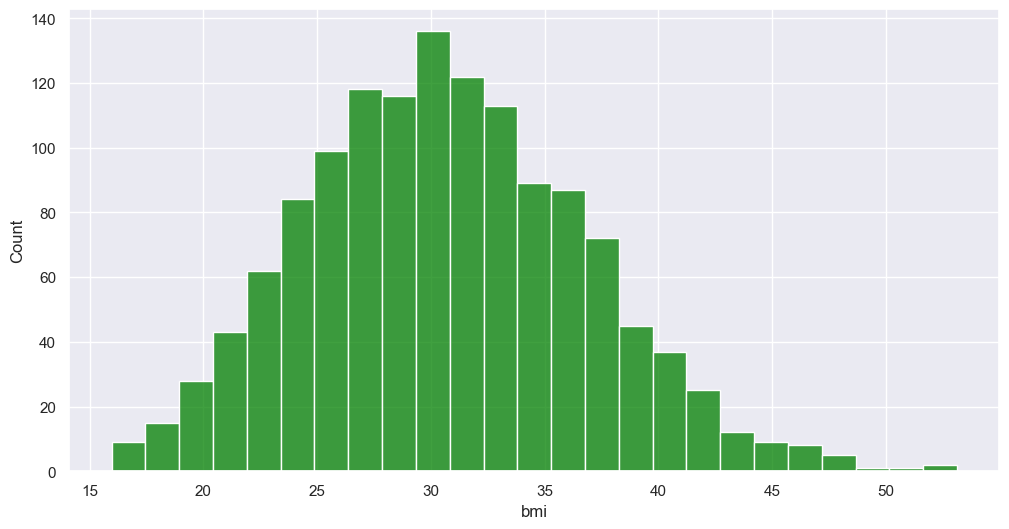

In [75]:
plt.figure(figsize=(12,6))
sns.histplot(data, x="bmi", color="Green");

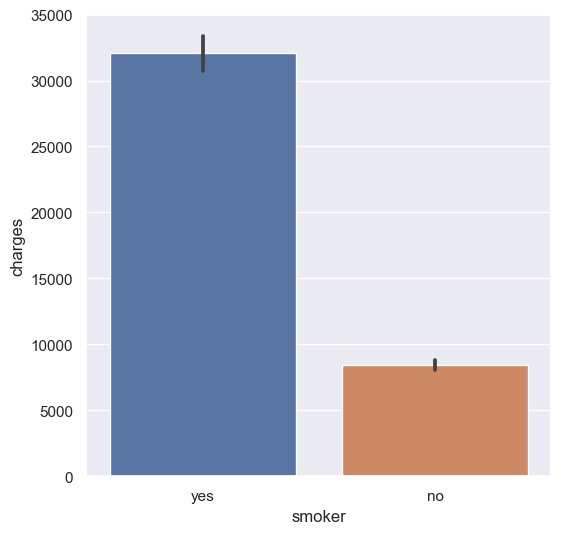

In [76]:
plt.figure(figsize=(6,6))
sns.barplot(x="smoker",y="charges",data=data);

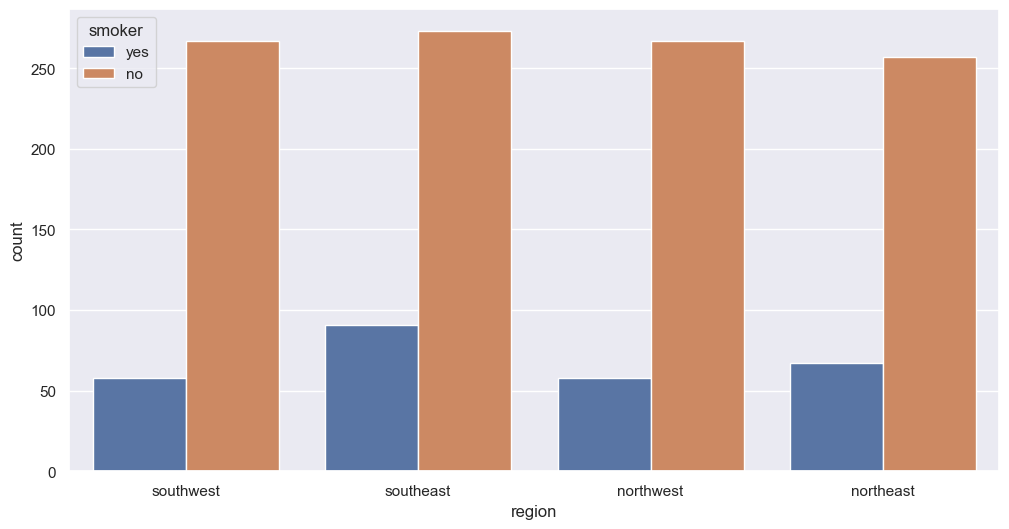

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x="region",data=data, hue="smoker");

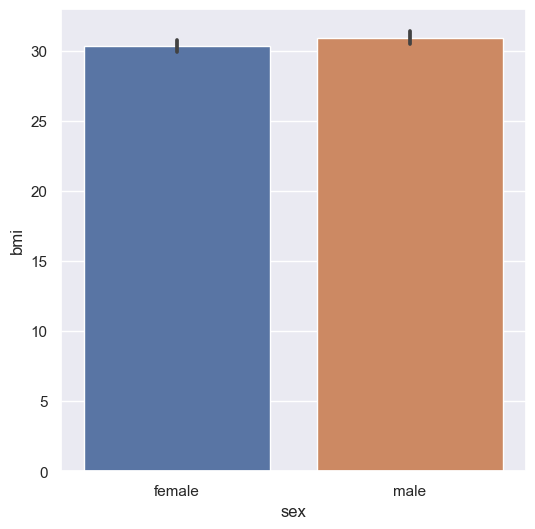

In [78]:
plt.figure(figsize=(6,6))
sns.barplot(x="sex",y="bmi",data=data);

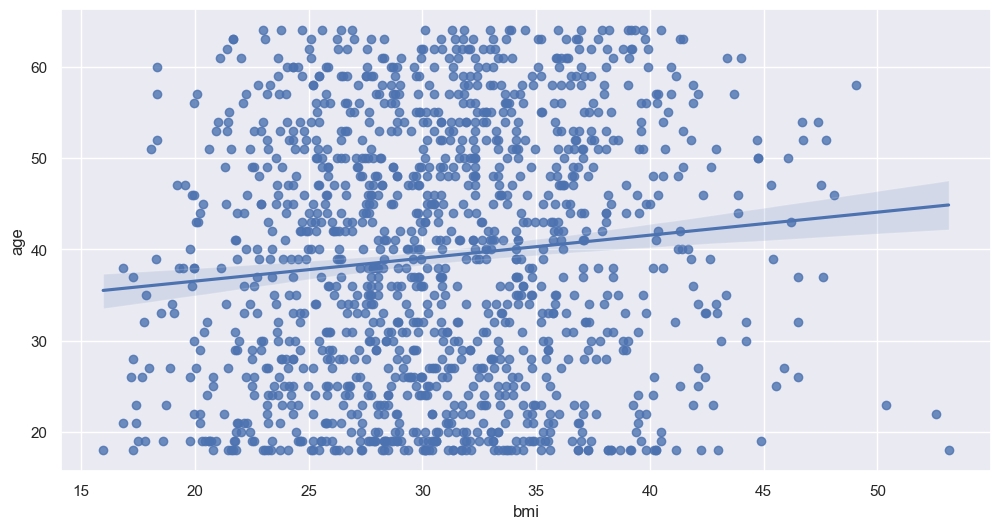

In [79]:
plt.figure(figsize=(12,6))
sns.regplot(x="bmi",y="age",data=data);

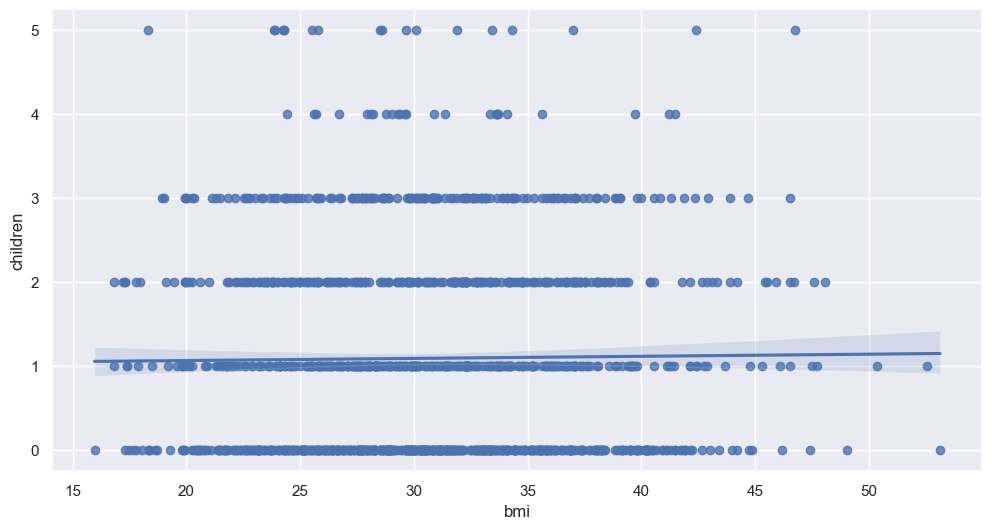

In [80]:
plt.figure(figsize=(12,6))
sns.regplot(x="bmi",y="children",data=data);

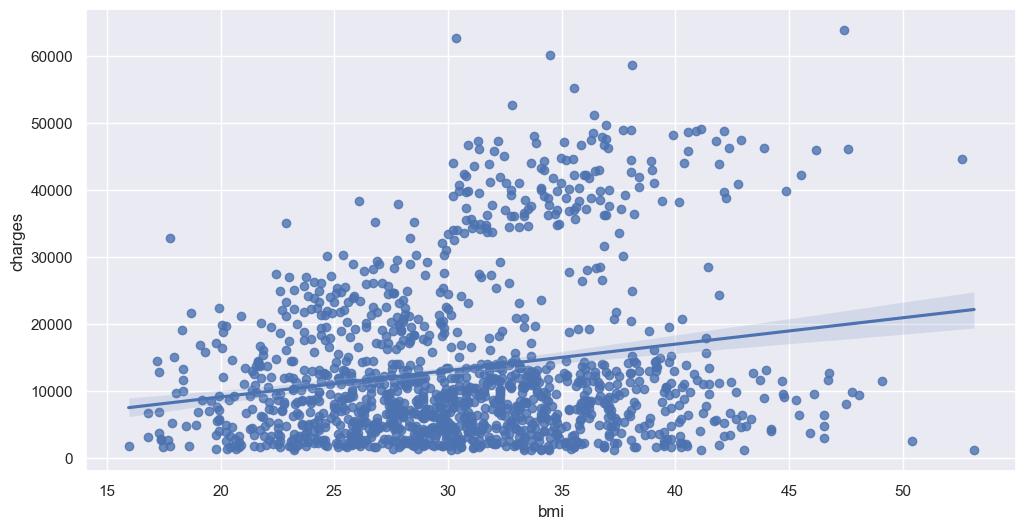

In [81]:
plt.figure(figsize=(12,6))
sns.regplot(x="bmi",y="charges",data=data);

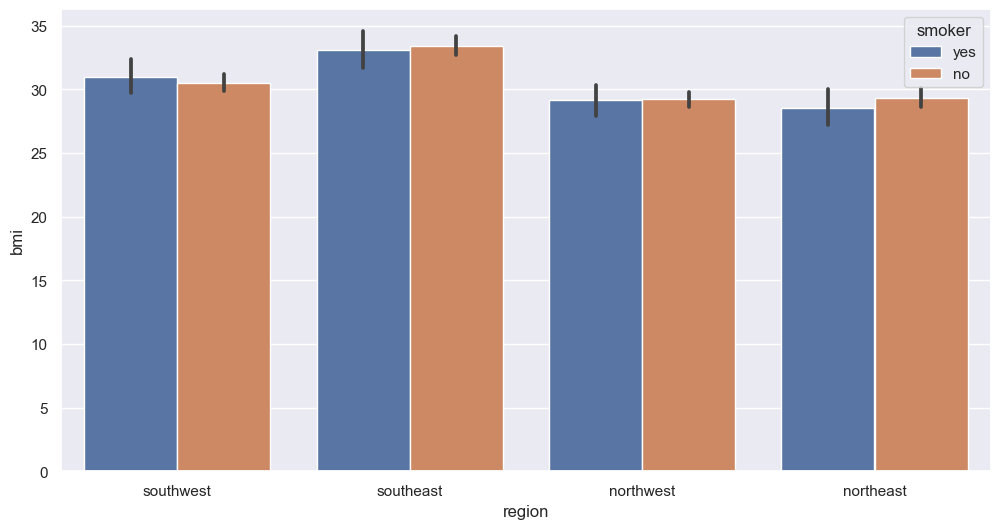

In [82]:
plt.figure(figsize=(12,6))
sns.barplot(x="region", y="bmi", hue="smoker", data=data);

In [83]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [84]:
def label_encoder(column_name):
  label_encoder = LabelEncoder()
  data[column_name] = label_encoder.fit_transform(data[column_name])

In [85]:
label_encoder('smoker')
label_encoder('sex')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [86]:
one_hot = pd.get_dummies(data['region'])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [87]:
data = pd.concat([data, one_hot], axis = 1)
data.drop('region', axis = 1, inplace = True)
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [88]:
X = data.drop('charges', axis=1)
y = data['charges']

In [91]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.25,
                                                   random_state = 1)

In [93]:
LINEAR_REG = LinearRegression()
DEC_TREE = DecisionTreeRegressor()
RANDOM_FOREST = RandomForestRegressor()
SVM = SVR()

In [94]:
LINEAR_REG_SCORE = cross_val_score(LINEAR_REG,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

In [95]:
DEC_TREE_SCORES = cross_val_score(DEC_TREE,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

In [96]:
RANDOM_FOREST_SCORES = cross_val_score(RANDOM_FOREST,
                               X_train,y_train,
                               scoring = 'neg_mean_squared_error',
                               cv=10)

In [97]:
SVM_SCORES = cross_val_score(SVM,
                             X_train,y_train,
                             scoring = 'neg_mean_squared_error',
                             cv=10)

In [98]:
def score_display(scores):
    scores = np.sqrt(-scores)
    print(f"""
    RMSE Scores : {scores}
    Mean : {scores.mean()}
    Standart Deviation : {scores.std()}
    """)

In [99]:
score_display(LINEAR_REG_SCORE)
score_display(DEC_TREE_SCORES)
score_display(RANDOM_FOREST_SCORES)
score_display(SVM_SCORES)


    RMSE Scores : [6015.78838283 6739.77513869 5716.03732315 5965.08652418 6429.61442921
 6089.37231558 5586.57360275 6744.00446215 6297.94436179 5607.65492396]
    Mean : 6119.185146428723
    Standart Deviation : 405.83799548976197
    

    RMSE Scores : [5940.684532   7354.72078661 5621.92362889 6694.44314227 7648.78654953
 5544.0858861  6900.30239486 6574.39411284 6616.1722313  5787.42806272]
    Mean : 6468.294132711782
    Standart Deviation : 690.1209038054515
    

    RMSE Scores : [4876.4722215  5408.51564958 4416.60101333 4932.48593972 5581.90379457
 4735.35792784 4847.89955634 5392.44919769 4683.50406938 4325.32793808]
    Mean : 4920.0517308031895
    Standart Deviation : 400.53587254698397
    

    RMSE Scores : [13011.97964291 13942.11270133 10907.48496574 12703.91000499
 13269.09747621 12787.80713972 11919.80280441 13185.93829329
 14060.17475065 13249.74843819]
    Mean : 12903.80562174458
    Standart Deviation : 881.2864346939704
    


In [101]:
params = {'n_estimators': [3, 10, 20, 50], 
          'n_jobs': [2, 3, 4, 10]} 


grid_s = GridSearchCV(RANDOM_FOREST, params, 
                     cv=5,
                     scoring='neg_mean_squared_error')

In [103]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [104]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 3}

In [105]:
predictions = grid_s.best_estimator_.predict(X_test)

In [106]:
def regression_evaluation(preds):
    mse = mean_squared_error(y_test,preds)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test,preds)
    mae = mean_absolute_error(y_test,preds)
    
    print(f"Mean Absolute Error: {mae} \nMean Squared Error:{mse} \nRoot Mean Squared Error:{rmse} \nR Squared Value:{r_squared}")

In [107]:
regression_evaluation(predictions)

Mean Absolute Error: 2717.614842697612 
Mean Squared Error:23523990.583366763 
Root Mean Squared Error:4850.153665953973 
R Squared Value:0.8251205081265831
